**The target of this notebook is to quickly gain insights of a dataset and build a competitive model in a stipulated time to check basic knowledge
I hope you will like it.This gives a competitive score and actually a pretty good one in first try within an hour.
This notebook is useful for people who quickly want to know how to approach a data science problem.Do upvote if u like it.**

In [243]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [244]:
pd.pandas.set_option('display.max_columns',None)
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [245]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
train.shape

(891, 12)

We have 10 features( exclusing passenger id and survived)

In [247]:
test.shape

(418, 11)

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [249]:
#number of passengers survived
sum(list(train.Survived))

342

342 survived out of 891

**DATA EXPLORATION**

In [250]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Only 38% people survived

Lets try to understand how survival varies with different features

In [251]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Higher class survived more

In [252]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


For anyone who has seen the movie this should not come as a surprise.(obviously there was space on wood plank for Leonardo DiCaprio)

In [253]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Believe me this is the most interesting thing i found.Dont want to draw any conclusion.But do think wisely.

In [254]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


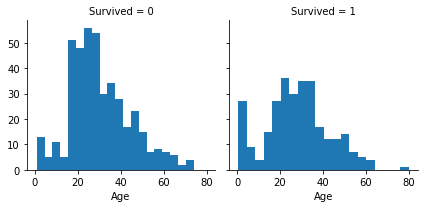

In [255]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Children were saved more

I know what you want next.Here we go

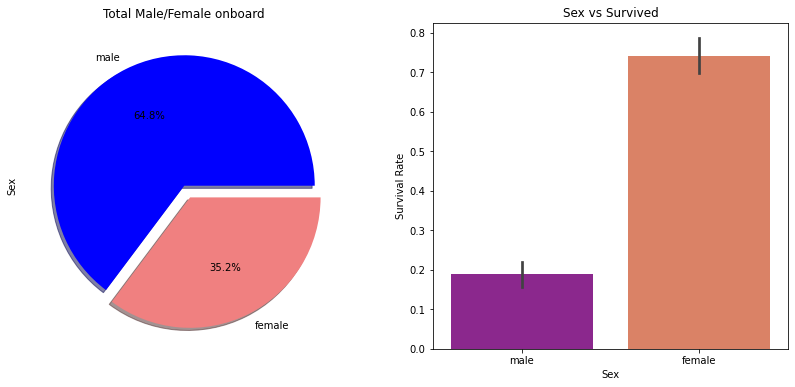

In [256]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['blue', 'lightcoral']
train['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Total Male/Female onboard')
plt.subplot(1,2,2)
sns.barplot(x="Sex", y="Survived", data=train,palette='plasma')
plt.title('Sex vs Survived')
plt.ylabel("Survival Rate")
plt.show()


Lets move ahead

But do note-gender seems an important feature for prediction

In [257]:
train.groupby(["Survived"]).Fare.mean()


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

higher fare people survived more

**Feature selection**

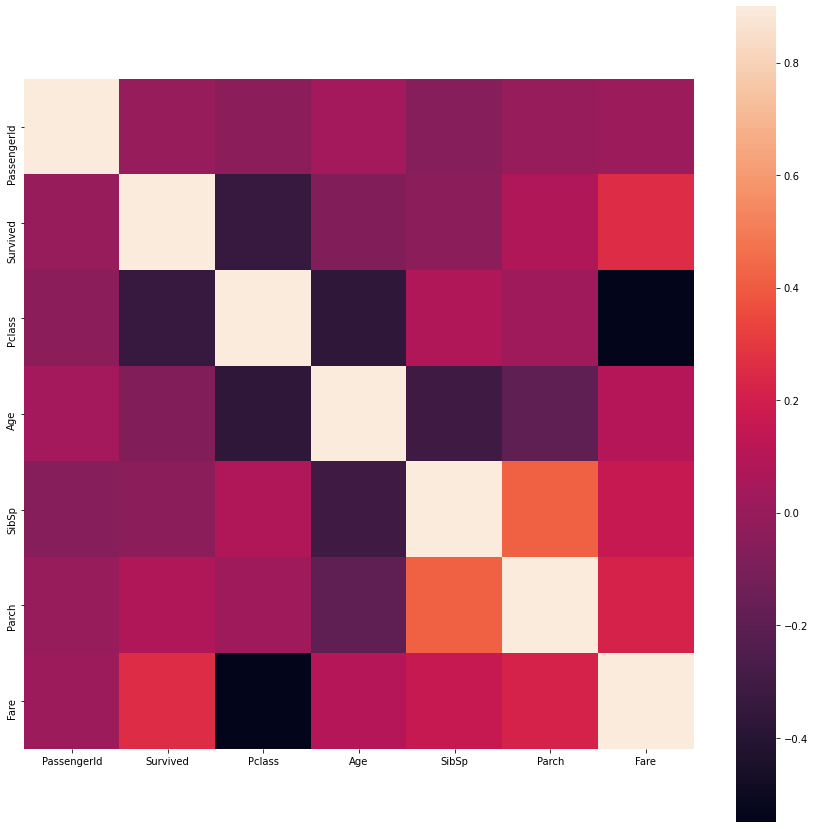

In [258]:
#Correlation:  Its the most basic way to find relation between any two quantities.
corr = train.corr()

plt.figure(figsize=(15,15))

sns.heatmap(corr,vmax=0.9,square=True)
plt.show()

In [259]:
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Fare,number of siblings/spouses,parents/children,age,Pcclass seems important.
(For newbies: Negative  sign in correlation just means that quantities are inversely proprtional, they can be negative and important)
passenger ID is obviously irrelevant

**Handling missing values**

In [260]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [261]:
#lets drop cabin
train.drop("Cabin", axis = 1, inplace = True)
test.drop("Cabin", axis = 1, inplace = True)

In [262]:
#age can be filled by median
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True) 

In [263]:
#embarked can be filled by median/or mode
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [264]:
Embarked_mode=train['Embarked'].mode()[0]
Embarked_mode

'S'

In [265]:

train["Embarked"].fillna("S", inplace = True)

In [266]:
test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Embarked       0.000000
dtype: float64

In [267]:
#fare can be filled with median
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [268]:
test.isnull().mean()

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [269]:
train.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

**Converting categorical to numeric**

In [270]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex']= test['Sex'].map({'female': 0, 'male': 1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1,'Q': 2})
test['Embarked']= test['Embarked'].map({'S': 0, 'C': 1,'Q': 2})

**Lets drop and combine some features now**

In [271]:
train.drop(["Name","Ticket"], axis = 1, inplace = True)
test.drop(["Name","Ticket"], axis = 1, inplace = True)

Sib/Sp and Parch can be combined

In [272]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1
train=train.drop(["SibSp","Parch"],axis=1)
test=test.drop(["SibSp","Parch"],axis=1)
print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


Feature Scaling

In [273]:
scaler = StandardScaler()

train[['Age','Fare']] = scaler.fit_transform(train[['Age','Fare']])
test[['Age','Fare']] = scaler.transform(test[['Age','Fare']])

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,1,-0.565736,-0.502445,0,2
1,2,1,1,0,0.663861,0.786845,1,2
2,3,1,3,0,-0.258337,-0.488854,0,1
3,4,1,1,0,0.433312,0.420730,0,2
4,5,0,3,1,0.433312,-0.486337,0,1


In [274]:
test.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,1,0.394887,-0.490783,2,1
1,893,3,0,1.355510,-0.507479,0,2
2,894,2,1,2.508257,-0.453367,2,1
3,895,3,1,-0.181487,-0.474005,0,1
4,896,3,0,-0.565736,-0.401017,0,3


**MODELS**

In [275]:
X_train = train.drop(['Survived','PassengerId'], axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

1.)Basic logistic regression

In [276]:
# Logistic Regression

LR = LogisticRegression()
LR.fit(X_train, y_train)

# Making Predictions
y_pred = LR.predict(X_test)

In [277]:
# Calculating the Accuracy of the model.

print("Accuracy:",round(LR.score(X_train, y_train)*100,2))

Accuracy: 80.25


2.)Random forest classifier

In [278]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [279]:
#Checking accuracy
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

97.98

In [280]:
Features=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']
feature_importance = pd.Series(random_forest.feature_importances_,index=Features).sort_values(ascending=False)
feature_importance

Sex         0.276808
Fare        0.265898
Age         0.265469
Pclass      0.084553
Family      0.079395
Embarked    0.027878
dtype: float64

Well family doesnt seems to be that important.(Only as a feature here)(Highly pun intended.)

Lets try to make a new feature

In [281]:
combine = [train, test]

In [282]:


train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [283]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


This seems better than Family feature

In [284]:
X_train = train.drop(['Survived','PassengerId'], axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [285]:
random_forest_2 = RandomForestClassifier(n_estimators=100)
random_forest_2.fit(X_train, y_train)
Y_pred = random_forest_2.predict(X_test)

In [286]:
#Checking accuracy
random_forest_2.score(X_train, y_train)

acc_random_forest_2 = round(random_forest_2.score(X_train, y_train) * 100, 2)
acc_random_forest_2

97.98

In [287]:
Features=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family',"IsAlone"]
feature_importance = pd.Series(random_forest_2.feature_importances_,index=Features).sort_values(ascending=False)
feature_importance

Fare        0.269169
Age         0.268320
Sex         0.266453
Pclass      0.089356
Family      0.063287
Embarked    0.031389
IsAlone     0.012026
dtype: float64

Well Is Alone doesnt seems as important as we thought.
Neither removing Embarked helped

In [288]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred})

output.to_csv('my_submission_2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


**3.)XGBoost**

In [289]:
# Instantiate our model
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_predictions = xg.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': xg_predictions})

output.to_csv('my_submission_3.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [290]:
xg.score(X_train,y_train)

0.9595959595959596

This is also poorer than random forest classifier.
Without using other models i can confidently say that Random forest classifier is indeed the best.
Feature engineering could be better.
"Data is fuel to the model, Make sure it is good quality"
Well i clearly did this notebook in a stipulated time limit,thus this was the best i can offer.
Suggestions to improve are welcome.
Happy learning.